In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/DailyDelhiClimateTest.csv')

In [4]:
# 2. Print basic information
print(df.head())       # Shows the first 5 rows
print(df.info())       # Shows data types and non-null counts
print(df.describe())   # Shows basic statistics
print(df.columns)      # Confirms column names

         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.03509

In [5]:
# 3. Create a fake 'date' column starting from 1st Jan 2025
df['date'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

In [6]:
# 4. Check for missing values
print(df.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [11]:
df['temp_7day_avg'] = df['meantemp'].rolling(window=7).mean()
df['humidity_change'] = df['humidity'].diff()

In [12]:
monthly_avg = df.resample('M').mean()
print(monthly_avg.head())

             meantemp   humidity  wind_speed  meanpressure  temp_7day_avg  \
date                                                                        
2025-01-31  15.710873  77.188256    7.162982    986.767947      15.458470   
2025-02-28  18.349981  64.375728    7.566294   1015.574251      17.876299   
2025-03-31  23.753760  48.009694    8.884385   1010.469641      22.815072   
2025-04-30  30.753663  30.408185    9.128446   1004.564831      30.388903   

            humidity_change  
date                         
2025-01-31        -0.328986  
2025-02-28        -0.869048  
2025-03-31        -0.452957  
2025-04-30        -0.436756  


<ipython-input-12-6f6e3f95298a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


In [13]:
df.to_csv('managed_weather_data.csv')

In [7]:
# 5. Fill missing values using forward fill method
df.fillna(method='ffill', inplace=True)

<ipython-input-7-29a0f39033a3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
# 6. Set 'date' as index for time series plots
df.set_index('date', inplace=True)

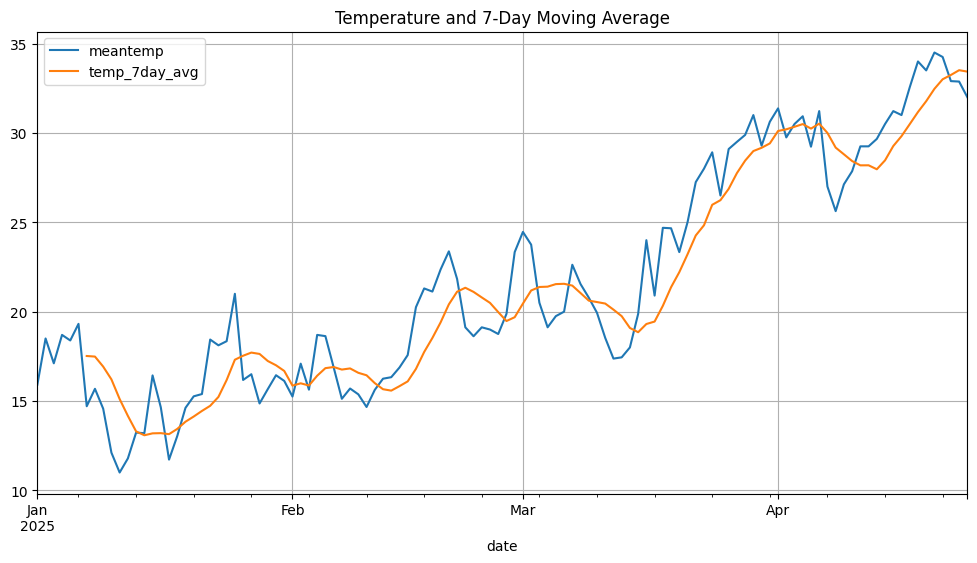

In [14]:
df[['meantemp', 'temp_7day_avg']].plot(figsize=(12,6))
plt.title('Temperature and 7-Day Moving Average')
plt.grid(True)
plt.show()

In [15]:
outliers = df[df['meantemp'] > df['meantemp'].mean() + 2*df['meantemp'].std()]
print(outliers)

            meantemp  humidity  wind_speed  meanpressure  temp_7day_avg  \
date                                                                      
2025-04-20      34.5      27.5      5.5625       998.625      32.468254   

            humidity_change  
date                         
2025-04-20            3.375  


An outlier is a data point that is very different from the rest of your data.

Think of it as a value that “sticks out”. it’s either way too high or way too low compared to the others.

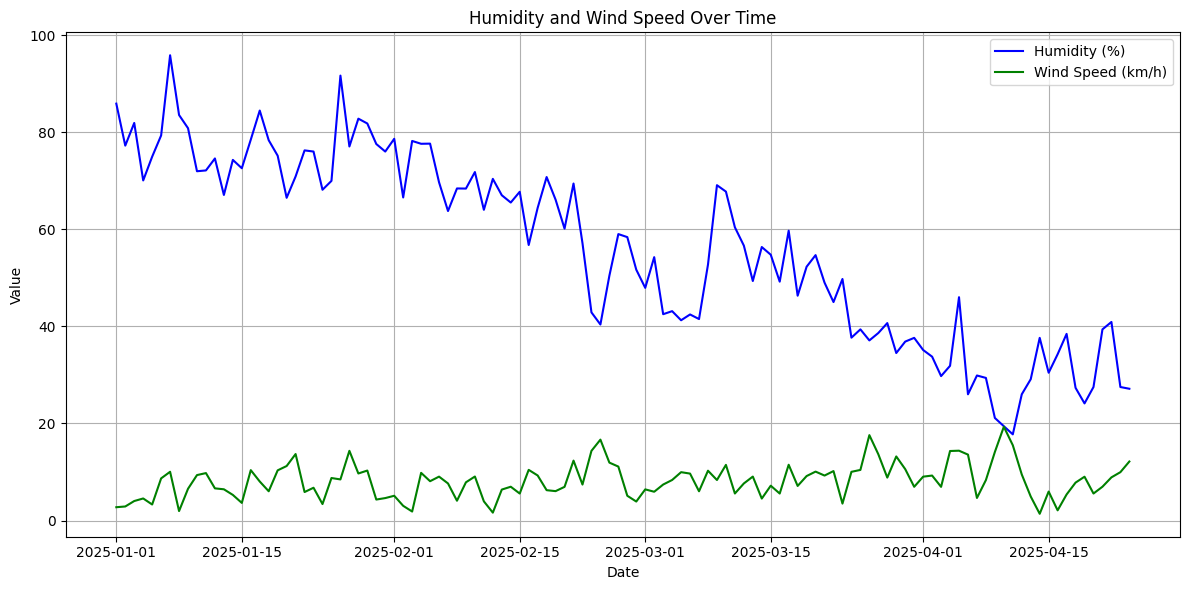

In [10]:
# 8. Plot humidity and wind speed on same graph
plt.figure(figsize=(12,6))
plt.plot(df['humidity'], label='Humidity (%)', color='blue')
plt.plot(df['wind_speed'], label='Wind Speed (km/h)', color='green')
plt.title('Humidity and Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()